<a href="https://colab.research.google.com/github/F1-bot/multi-label-text-classification-for-professional-orientation/blob/main/F1_bot_v2_multi_label_text_classification_for_professional_orientation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# F1-bot / multi-label-text-classification-for-professional-orientation

In [2]:
import keras as k
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from google.colab import files

# імпорт необхідних для роботи бібліотек

In [3]:
data_frame = pd.read_csv('https://raw.githubusercontent.com/F1-bot/multi-label-text-classification-for-professional-orientation/main/P_BASE_v130813.csv')
# завантаження data set проекту

In [5]:
data_frame.head()
# попередній перегляд успішності завантаження data set проекту

,Age,ET,IT1,ST,NT,TT1,FT,JT,PT,AT,TT2,RPT,IPT,APT,SPT,PPT,CPT,PWP1,PRE,PWP2,PET1,PET2,PPET,IQ,RSA,RSB,RSC,RSD,RSE,ABF,BCM,CVW,CAD,EU,EM,EA,H,HEM,IT2,LR,LES,LST,MAPR,MI,PC,PSA,PHR,RS,SP,SC,TE,TL
0,39,11,89,59,41,89,11,78,22,34,66,9,11,3,4,6,10,0,10,4,1,1,8,130,100,100,92,100,100,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,33,63,37,45,55,39,61,43,57,41,59,10,4,8,9,7,5,12,4,1,2,2,3,102,100,92,75,75,33,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,39,54,46,67,33,54,46,63,37,63,37,11,7,4,7,3,11,8,5,1,1,0,9,110,100,100,92,58,58,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,37,41,59,32,68,61,39,81,19,39,61,8,10,2,4,7,12,4,5,1,1,1,12,126,100,100,100,92,83,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,34,28,72,68,32,81,19,71,29,76,24,11,11,4,5,1,11,1,6,8,2,0,7,108,92,83,83,75,67,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
input_names = ["Age", "ET", "IT1", "ST", "NT", "TT1", "FT", "JT", "PT", "AT", "TT2", "RPT", "IPT", "APT", "SPT", "PPT", "CPT",
               "PWP1", "PRE", "PWP2", "PET1", "PET2", "PPET", "IQ", "RSA", "RSB", "RSC", "RSD", "RSE"]
output_names = ["ABF", "BCM", "CVW", "CAD", "EU", "EM", "EA", "H", "HEM", "IT2", "LR", "LES", "LST", "MAPR", "MI", "PC",
                "PSA", "PHR", "RS", "SP", "SC", "TE", "TL"]
                
                # підготовка найменунь, де input_names визнає вхідні дані (про особу), а output, відповідно, вихідні (про напрями професійної діяльності)

In [ ]:
raw_input_data = data_frame[input_names]
raw_output_data = data_frame[output_names]
# початковий фрейм з необробленими вхідними та вихідними даними

In [4]:
print(data_frame.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 52 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     966 non-null    int64
 1   ET      966 non-null    int64
 2   IT1     966 non-null    int64
 3   ST      966 non-null    int64
 4   NT      966 non-null    int64
 5   TT1     966 non-null    int64
 6   FT      966 non-null    int64
 7   JT      966 non-null    int64
 8   PT      966 non-null    int64
 9   AT      966 non-null    int64
 10  TT2     966 non-null    int64
 11  RPT     966 non-null    int64
 12  IPT     966 non-null    int64
 13  APT     966 non-null    int64
 14  SPT     966 non-null    int64
 15  PPT     966 non-null    int64
 16  CPT     966 non-null    int64
 17  PWP1    966 non-null    int64
 18  PRE     966 non-null    int64
 19  PWP2    966 non-null    int64
 20  PET1    966 non-null    int64
 21  PET2    966 non-null    int64
 22  PPET    966 non-null    int64
 23  IQ      966 non

In [ ]:
max_age = 46
max_iq = 140
max_pt = 14
max_q = 100
max_p = 12
max_r = 100
encoders = {"Age": lambda age: [age/max_age],
            "ET": lambda et: [et/max_q],
            "IT1": lambda it1: [it1/max_q],
            "ST": lambda st: [st/max_q],
            "NT": lambda nt: [nt/max_q],
            "TT1": lambda tt1: [tt1/max_q],
            "FT": lambda ft: [ft/max_q],
            "JT": lambda jp: [jp/max_q],
            "PT": lambda pt: [pt/max_q],
            "AT": lambda at: [at/max_q],
            "TT2": lambda tt2: [tt2/ max_q],
            "RPT": lambda rpt: [rpt/max_pt],
            "IPT": lambda ipt: [ipt/max_pt],
            "APT": lambda apt: [apt/max_pt],
            "SPT": lambda spt: [spt/max_pt],
            "PPT": lambda ppt: [ppt/max_pt],
            "CPT": lambda cpt: [cpt/max_pt],
            "PWP1": lambda pwp1: [pwp1/max_p],
            "PRE": lambda pre: [pre/max_p],
            "PWP2": lambda pwp2: [pwp2/max_p],
            "PET1": lambda pet1: [pet1/max_p],
            "PET2": lambda pet2: [pet2/max_p],
            "PPET": lambda ppet: [ppet/max_p],
            "IQ": lambda iq: [iq/max_iq],
            "RSA": lambda rsa: [rsa/max_r],
            "RSB": lambda rsb: [rsb/max_r],
            "RSC": lambda rsc: [rsc/max_r],
            "RSD": lambda rsd: [rsd/max_r],
            "RSE": lambda rse: [rse/max_r],

            "ABF": lambda abf_value: [abf_value],
            "BCM": lambda bcm_value: [bcm_value],
            "CVW": lambda cvw_value: [cvw_value],
            "CAD": lambda cad_value: [cad_value],
            "EU": lambda eu_value: [eu_value],
            "EM": lambda em_value: [em_value],
            "EA": lambda ea_value: [ea_value],
            "H": lambda h_value: [h_value],
            "HEM": lambda hem_value: [hem_value],
            "IT2": lambda it2_value: [it2_value],
            "LR": lambda lr_value: [lr_value],
            "LES": lambda les_value: [les_value],
            "LST": lambda lst_value: [lst_value],
            "MAPR": lambda mapr_value: [mapr_value],
            "MI": lambda mi_value: [mi_value],
            "PC": lambda pc_value: [pc_value],
            "PSA": lambda psa_value: [psa_value],
            "PHR": lambda phr_value: [phr_value],
            "RS": lambda rs_value: [rs_value],
            "SP": lambda sp_value: [sp_value],
            "SC": lambda sc_value: [sc_value],
            "TE": lambda te_value: [te_value],
            "TL": lambda tl_value: [tl_value]}

            # словник вхідних та вихідних даних (з нормалізацією)

In [ ]:
def dataframe_to_dict(df):
    result = dict()
    for column in df.columns:
        values = data_frame[column].values
        result[column] = values
    return result
    
    # датафрейм для csv

In [ ]:
def make_supervised(df):
    raw_input_data = data_frame[input_names]
    raw_output_data = data_frame[output_names]
    return {"inputs": dataframe_to_dict(raw_input_data),
            "outputs": dataframe_to_dict(raw_output_data)}

    # розподіл вхідних та вихідних даних

In [ ]:
def encode(data):
    vectors = []
    for data_name, data_values in data.items():
        encoded = list(map(encoders[data_name], data_values))
        vectors.append(encoded)
    formatted = []
    for vector_raw in list(zip(*vectors)):
        vector = []
        for element in vector_raw:
            for e in element:
                vector.append(e)
        formatted.append(vector)
    return formatted

    # функція для кодування у вектори

In [ ]:
supervised = make_supervised(data_frame)
encoded_inputs = np.array(encode(supervised["inputs"]))
encoded_outputs = np.array(encode(supervised["outputs"]))

# прийом датафрейму з вхідними та вихідними даними

In [ ]:
train_x = encoded_inputs[:600]
train_y = encoded_outputs[:600]

test_x = encoded_inputs[600:] 
test_y = encoded_outputs[600:] 

# розподіл вибірки

In [ ]:
INPUT_DIM = 29
OUTPUT_DIM = 23

# кількість вхідних та вихідних елементів

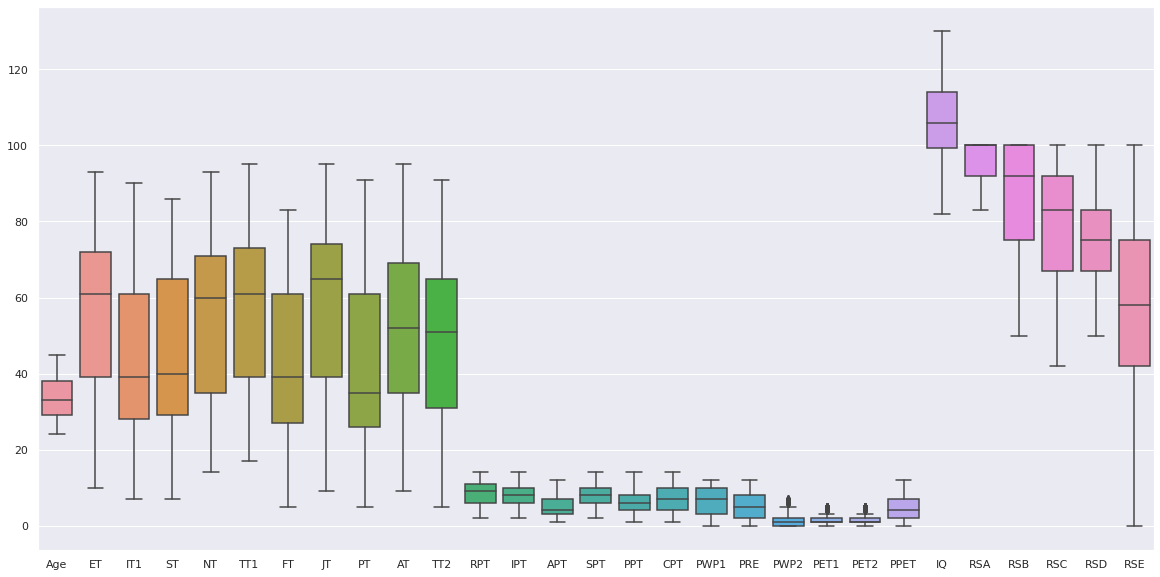

In [ ]:
f,ax=plt.subplots(figsize=(20,10))
sns.boxplot(data=data_frame[input_names],ax=ax)
plt.show()

In [ ]:
def sifenfa(x):
    a = x.quantile(0.75)
    b = x.quantile(0.25)
    c = x
    d = x
    c[(c >= (a - b) * 1.5 + a) | (c <= b - (a - b) * 1.5)] = np.nan
    c.fillna(c.median(),inplace=True)
    d[(d >= (a - b) * 1.5 + a) | (d <= b - (a - b) * 1.5)] = np.nan
    d.fillna(d.median(), inplace=True)
 
sifenfa(data_frame['APT'])
sifenfa(data_frame['PWP2'])
sifenfa(data_frame['PET1'])
sifenfa(data_frame['PET2'])
sifenfa(data_frame['IQ'])
sifenfa(data_frame['RSA'])
sifenfa(data_frame['RSD'])

# Приибирання викидів методом квантилів

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying

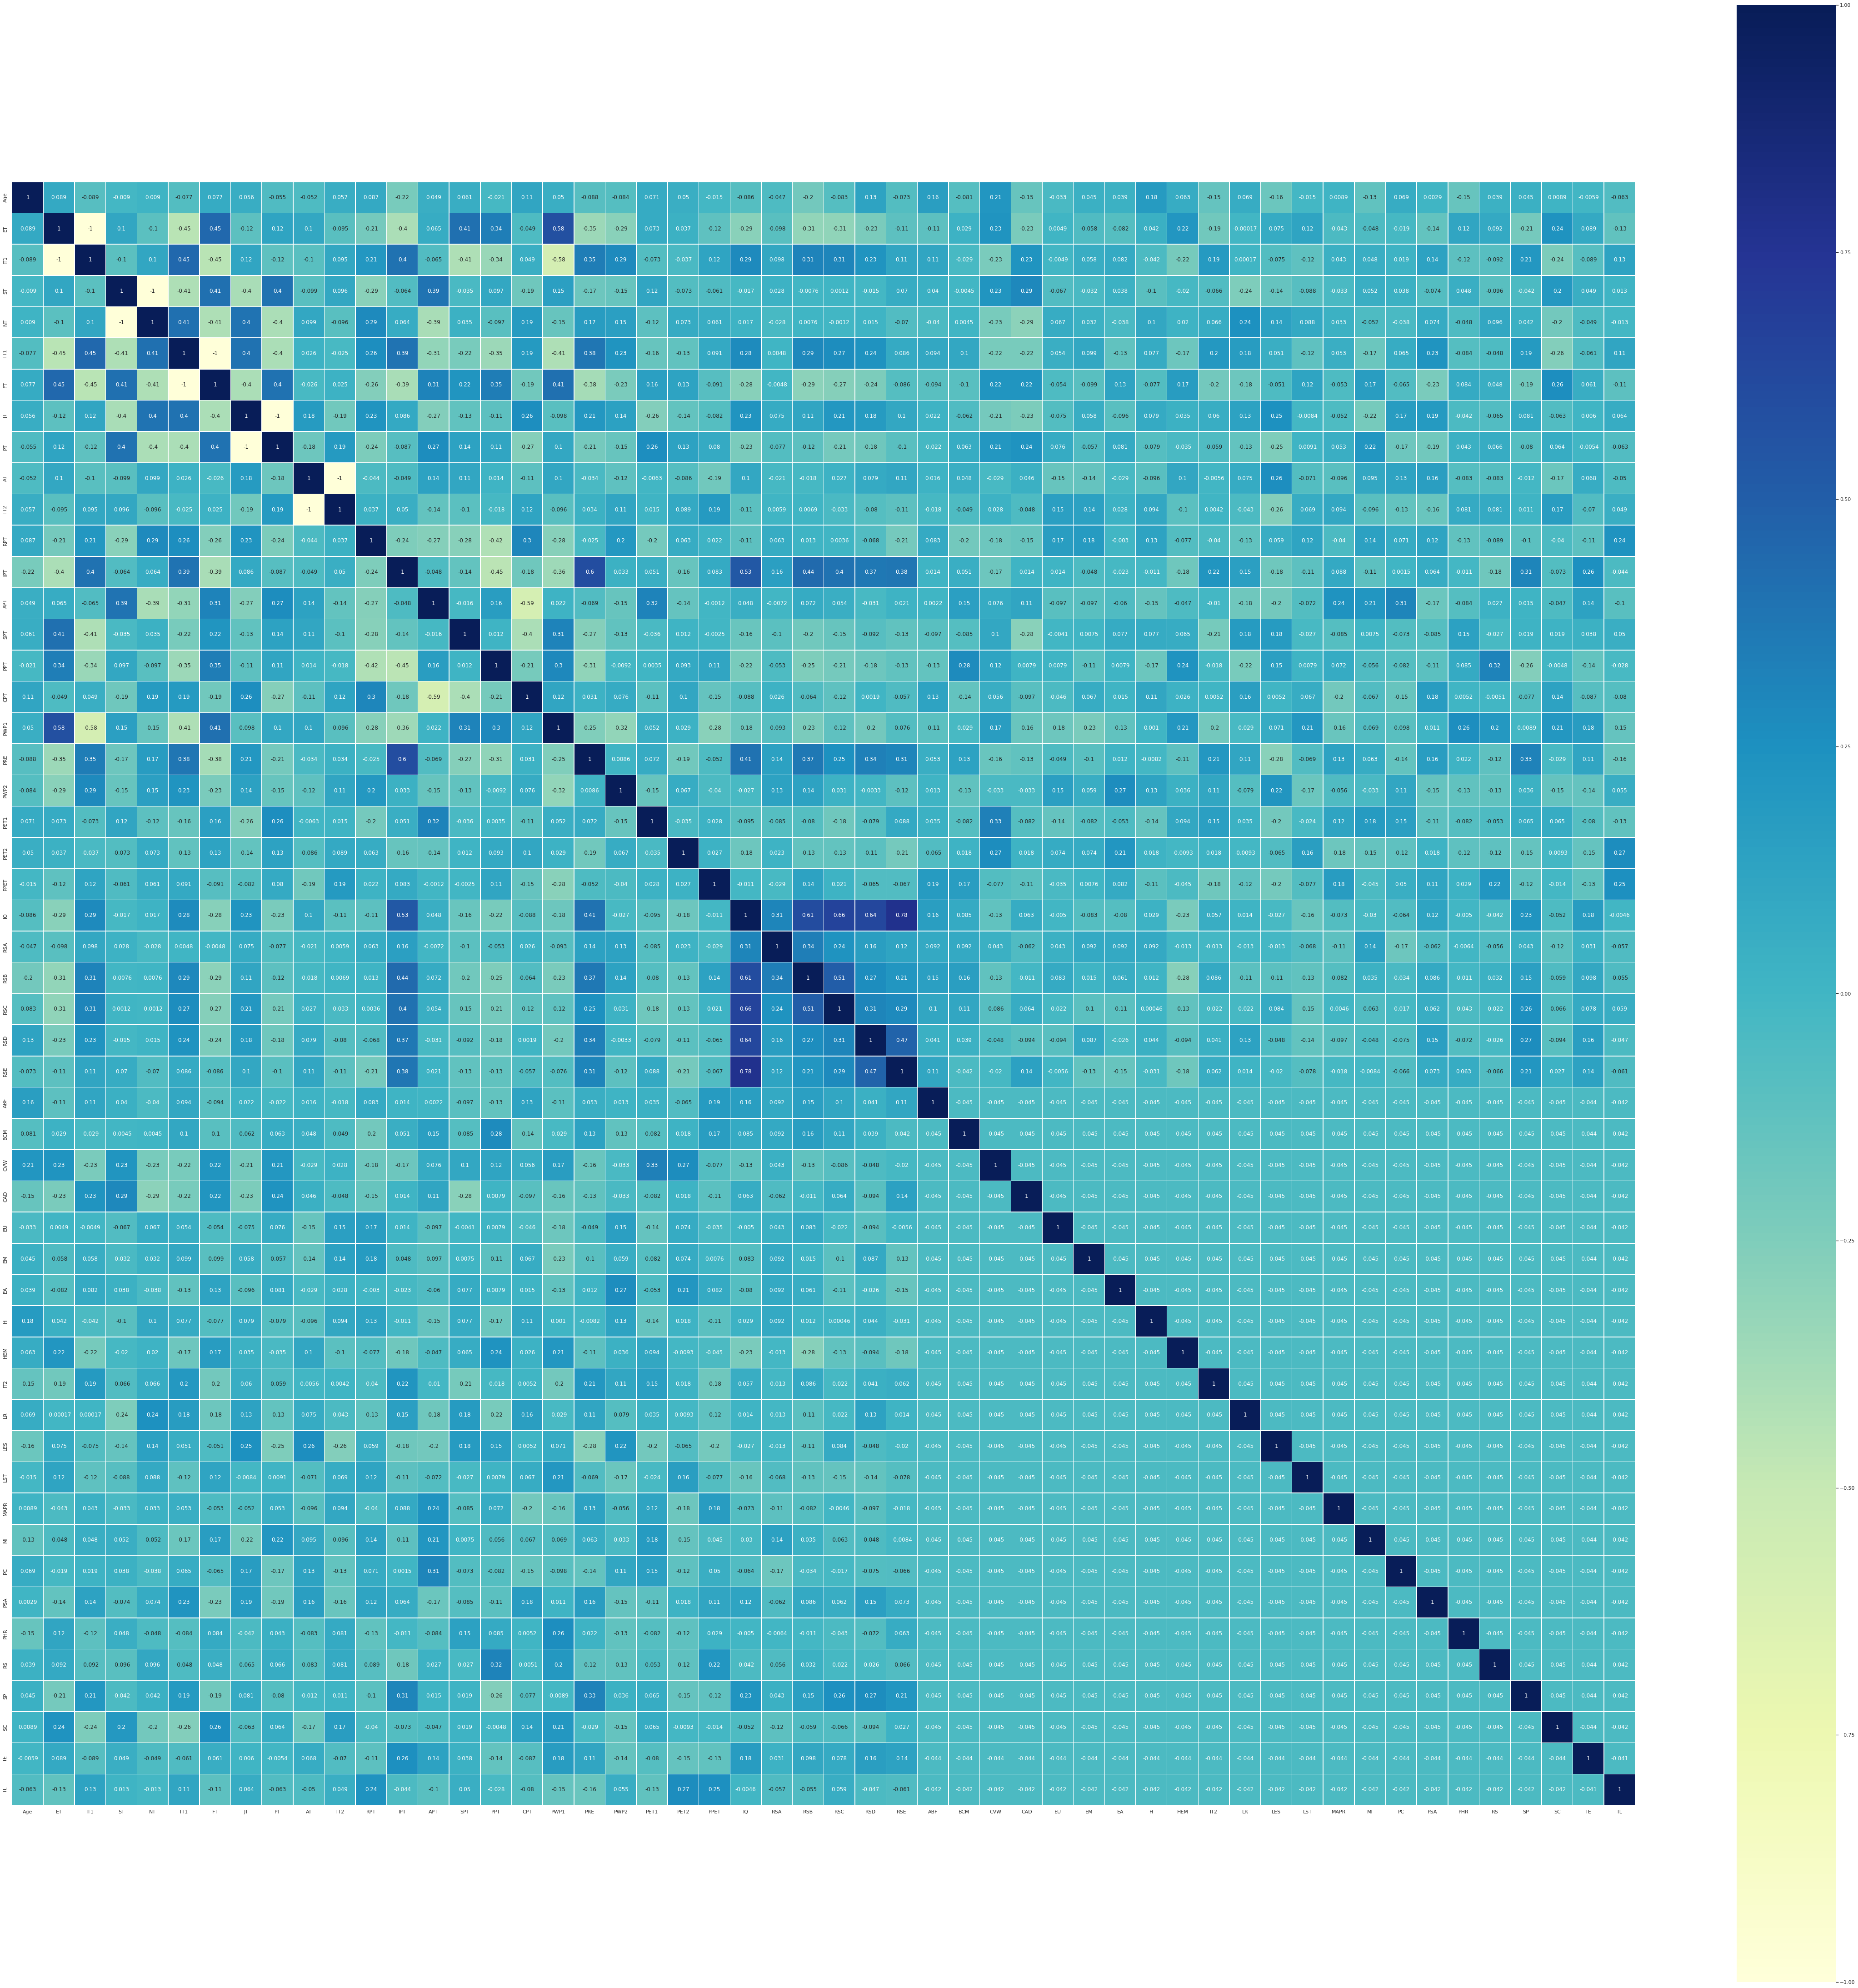

In [ ]:
internal_chars = data_frame.columns
corrmat = data_frame[internal_chars].corr()
plt.figure(figsize=(80, 80))
sns.heatmap(corrmat, square=True, linewidths=.5, annot=True, cmap="YlGnBu")
plt.show()

In [ ]:
model = k.models.Sequential()
model.add(k.layers.Dense(128, activation='relu',  input_dim = INPUT_DIM ))
model.add(k.layers.Dense(256, activation='relu'))
model.add(k.layers.Dropout(0.6))
model.add(k.layers.Dense(512, activation='relu'))
model.add(k.layers.Dropout(0.8))
model.add(k.layers.Dense(512, activation='relu'))
model.add(k.layers.Dropout(0.6))
model.add(k.layers.Dense(OUTPUT_DIM, activation='softmax'))
# опис моделі для класифікації та прогназування

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.0008)
model.compile(loss="mse", optimizer=opt, metrics=["accuracy"])

# компіляція моделі

In [ ]:
fit_results = model.fit(train_x, train_y, epochs=1000, batch_size=16, validation_split=0.1)

# тренування моделі за розподіленою вибіркою

Epoch 1/1000
34/34 [==============================] - 1s 17ms/step - loss: 0.0419 - accuracy: 0.0426 - val_loss: 0.0416 - val_accuracy: 0.0333
Epoch 2/1000
34/34 [==============================] - 0s 12ms/step - loss: 0.0416 - accuracy: 0.0333 - val_loss: 0.0415 - val_accuracy: 0.2000
Epoch 3/1000
34/34 [==============================] - 0s 12ms/step - loss: 0.0415 - accuracy: 0.0630 - val_loss: 0.0415 - val_accuracy: 0.1500
Epoch 4/1000
34/34 [==============================] - 0s 12ms/step - loss: 0.0415 - accuracy: 0.0500 - val_loss: 0.0414 - val_accuracy: 0.3000
Epoch 5/1000
34/34 [==============================] - 0s 12ms/step - loss: 0.0414 - accuracy: 0.0852 - val_loss: 0.0411 - val_accuracy: 0.1833
Epoch 6/1000
34/34 [==============================] - 0s 13ms/step - loss: 0.0411 - accuracy: 0.1000 - val_loss: 0.0402 - val_accuracy: 0.1833
Epoch 7/1000
34/34 [==============================] - 0s 12ms/step - loss: 0.0407 - accuracy: 0.1074 - val_loss: 0.0379 - val_accuracy: 0.2167

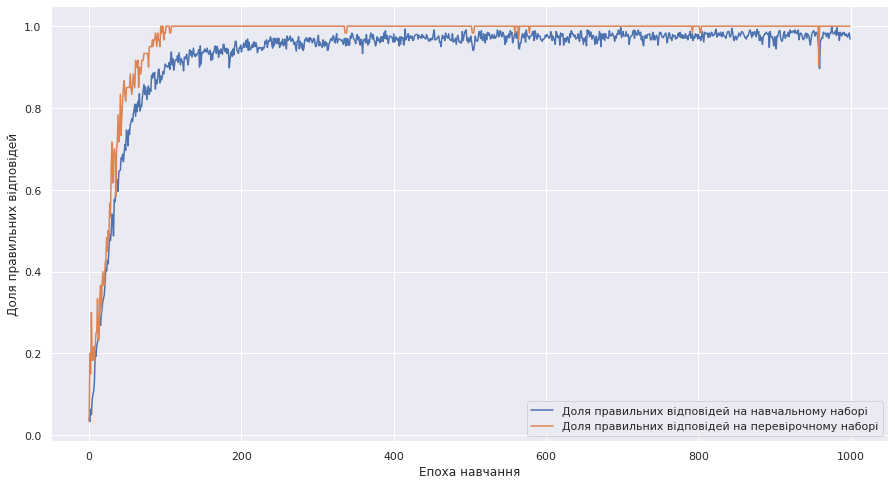

In [ ]:
plt.plot(fit_results.history['accuracy'], 
         label='Доля правильних відповідей на навчальному наборі')
plt.plot(fit_results.history['val_accuracy'], 
         label='Доля правильних відповідей на перевірочному наборі')
plt.figure
plt.xlabel('Епоха навчання')
plt.ylabel('Доля правильних відповідей')
plt.legend()
plt.show()

# Візуалізація правильних відповідей при навчанні та перевірці

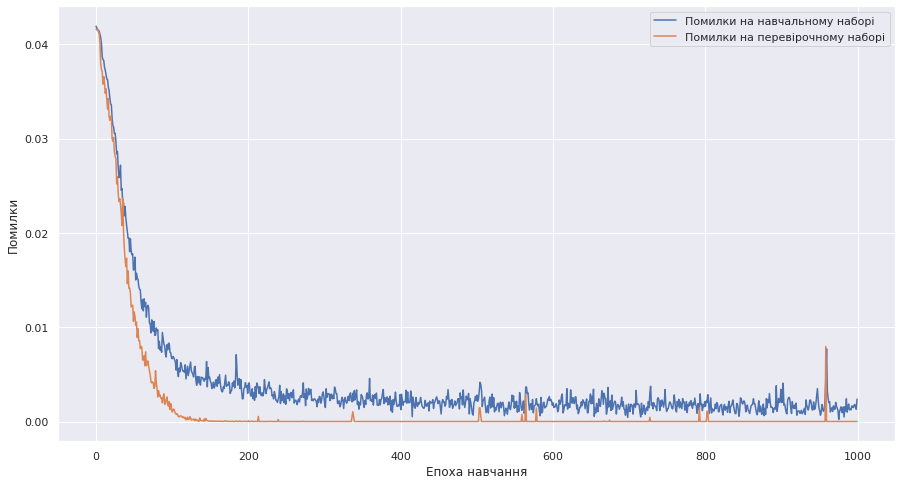

In [ ]:
plt.plot(fit_results.history['loss'], 
         label='Помилки на навчальному наборі')
plt.plot(fit_results.history['val_loss'], 
         label='Помилки на перевірочному наборі')
plt.figure
plt.xlabel('Епоха навчання')
plt.ylabel('Помилки')
plt.legend()
plt.show()

# Візуалізація помилок при навчанні та перевірці

In [ ]:
predicted_test = model.predict(test_x)
print(predicted_test[0])

# загальні тенденції за всіма елементами виводу

[2.74646652e-37 0.00000000e+00 5.90535354e-31 2.49823371e-31
 0.00000000e+00 1.45695938e-35 4.36778101e-29 0.00000000e+00
 1.00000000e+00 2.24790076e-24 1.15095018e-28 1.82513751e-20
 4.17569962e-25 0.00000000e+00 2.45574372e-23 1.64566323e-20
 1.12846006e-29 5.30450268e-23 5.41792994e-20 0.00000000e+00
 1.96168932e-21 8.02444541e-38 7.65999828e-28]


In [ ]:
real_data = data_frame.iloc[600:][output_names+input_names]
real_data.reset_index(inplace=True)
real_data["ABF"] = predicted_test[:,0]
real_data["BCM"] = predicted_test[:,1]
real_data["CVW"] = predicted_test[:,2]
real_data["CAD"] = predicted_test[:,3]
real_data["EU"] = predicted_test[:,4]
real_data["EM"] = predicted_test[:,5]
real_data["EA"] = predicted_test[:,6]
real_data["H"] = predicted_test[:,7]
real_data["HEM"] = predicted_test[:,8]
real_data["IT2"] = predicted_test[:,9]
real_data["LR"] = predicted_test[:,10]
real_data["LES"] = predicted_test[:,11]
real_data["LST"] = predicted_test[:,12]
real_data["MAPR"] = predicted_test[:,13]
real_data["MI"] = predicted_test[:,14]
real_data["PC"] = predicted_test[:,15]
real_data["PSA"] = predicted_test[:,16]
real_data["PHR"] = predicted_test[:,17]
real_data["RS"] = predicted_test[:,18]
real_data["SP"] = predicted_test[:,19]
real_data["SC"] = predicted_test[:,20]
real_data["TE"] = predicted_test[:,21]
real_data["TL"] = predicted_test[:,22]
print(real_data)

# виведення інформації відповідності, відповідно до вихідних елементів

     index           ABF           BCM           CVW  ...  RSB  RSC   RSD  RSE
0      600  2.746467e-37  0.000000e+00  5.905354e-31  ...   83   92  58.0   42
1      601  0.000000e+00  0.000000e+00  0.000000e+00  ...   83   67  83.0   42
2      602  0.000000e+00  0.000000e+00  0.000000e+00  ...   50   50  67.0   58
3      603  0.000000e+00  0.000000e+00  0.000000e+00  ...   58   67  92.0   50
4      604  0.000000e+00  0.000000e+00  1.426139e-34  ...   83   75  50.0   17
..     ...           ...           ...           ...  ...  ...  ...   ...  ...
361    961  5.262831e-03  1.114662e-03  3.655363e-04  ...   92   92  83.0   92
362    962  4.091566e-15  6.459402e-13  1.000000e+00  ...  100  100  92.0   67
363    963  5.262831e-03  1.114662e-03  3.655363e-04  ...   92   92  83.0   92
364    964  4.091535e-15  6.459377e-13  1.000000e+00  ...  100  100  92.0   67
365    965  5.262868e-03  1.114665e-03  3.655374e-04  ...   92   92  83.0   92

[366 rows x 53 columns]


In [ ]:
pd.DataFrame(real_data)

# табличний вигляд опрацьованих вихідних даних

,index,ABF,BCM,CVW,CAD,EU,EM,EA,H,HEM,IT2,LR,LES,LST,MAPR,MI,PC,PSA,PHR,RS,SP,SC,TE,TL,Age,ET,IT1,ST,NT,TT1,FT,JT,PT,AT,TT2,RPT,IPT,APT,SPT,PPT,CPT,PWP1,PRE,PWP2,PET1,PET2,PPET,IQ,RSA,RSB,RSC,RSD,RSE
0,600,2.746467e-37,0.000000e+00,5.905354e-31,2.498234e-31,0.000000e+00,1.456959e-35,4.367781e-29,0.000000e+00,1.000000e+00,2.247901e-24,1.150950e-28,1.825138e-20,4.175700e-25,0.000000e+00,2.455744e-23,1.645663e-20,1.128460e-29,5.304503e-23,5.417930e-20,0.000000e+00,1.961689e-21,8.024445e-38,7.659998e-28,26,74,26,19,81,61,39,73,27,63,37,8,8,4.0,10,8,5,10,4,2.0,2.0,1.0,5,102.0,100.0,83,92,58.0,42
1,601,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,8.662849e-35,0.000000e+00,5.204927e-28,3.613303e-37,0.000000e+00,5.400849e-33,7.558258e-29,0.000000e+00,4.729518e-34,1.472436e-28,0.000000e+00,2.942978e-30,0.000000e+00,0.000000e+00,33,73,27,72,28,28,72,69,31,69,31,8,3,8.0,6,10,8,10,2,1.0,1.0,1.0,2,102.0,100.0,83,67,83.0,42
2,602,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.363432e-37,0.000000e+00,5.447517e-30,0.000000e+00,0.000000e+00,3.874650e-35,1.999555e-30,0.000000e+00,1.466007e-36,2.108032e-29,0.000000e+00,4.119520e-31,0.000000e+00,0.000000e+00,41,81,19,63,37,37,63,70,30,54,46,7,3,3.0,6,12,12,11,1,3.0,2.0,2.0,5,90.0,100.0,50,50,67.0,58
3,603,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.719263e-33,0.000000e+00,0.000000e+00,0.000000e+00,5.375111e-35,0.000000e+00,0.000000e+00,3.461155e-33,0.000000e+00,1.662035e-35,0.000000e+00,0.000000e+00,44,69,31,43,57,30,70,83,17,60,40,8,2,2.0,6,13,12,10,7,1.0,2.0,2.0,2,96.0,100.0,58,67,92.0,50
4,604,0.000000e+00,0.000000e+00,1.426139e-34,7.226438e-35,0.000000e+00,0.000000e+00,1.238684e-32,0.000000e+00,1.000000e+00,1.087838e-26,1.662901e-31,7.980000e-23,3.308592e-28,0.000000e+00,5.387658e-26,4.632762e-23,1.149395e-32,1.541167e-25,4.959606e-22,0.000000e+00,2.798892e-24,0.000000e+00,8.259041e-31,34,83,17,39,61,42,58,41,59,57,43,7,8,4.0,12,7,5,10,3,1.0,3.0,1.0,5,92.0,92.0,83,75,50.0,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,961,5.262831e-03,1.114662e-03,3.655363e-04,7.569134e-06,3.534751e-02,9.346387e-03,9.459564e-01,1.098051e-03,1.549763e-06,1.105886e-05,1.311908e-07,4.967875e-06,3.548870e-06,1.069994e-05,1.587406e-04,5.178008e-05,2.749642e-08,7.473704e-08,4.198508e-07,2.189577e-07,2.385907e-04,2.098784e-08,1.019093e-03,38,58,42,41,59,67,33,65,35,92,8,6,7,5.0,11,9,4,5,8,4.0,1.0,0.0,6,120.0,92.0,92,92,83.0,92
362,962,4.091566e-15,6.459402e-13,1.000000e+00,6.980854e-10,4.504408e-11,2.021844e-15,2.396075e-09,6.998962e-09,8.248935e-12,1.111783e-14,2.000615e-15,3.887283e-10,1.163009e-11,6.100144e-13,1.106379e-09,1.209390e-09,1.117003e-15,5.009354e-19,5.480540e-09,2.962731e-18,3.270840e-08,1.716978e-14,1.208534e-14,28,51,49,67,33,35,65,29,71,32,68,8,4,8.0,7,8,7,10,3,2.0,3.0,3.0,3,122.0,100.0,100,100,92.0,67
363,963,5.262831e-03,1.114662e-03,3.655363e-04,7.569134e-06,3.534751e-02,9.346387e-03,9.459564e-01,1.098051e-03,1.549763e-06,1.105886e-05,1.311908e-07,4.967875e-06,3.548870e-06,1.069994e-05,1.587406e-04,5.178008e-05,2.749642e-08,7.473704e-08,4.198508e-07,2.189577e-07,2.385907e-04,2.098784e-08,1.019093e-03,38,58,42,41,59,67,33,65,35,92,8,6,7,5.0,11,9,4,5,8,4.0,1.0,0.0,6,120.0,92.0,92,92,83.0,92
364,964,4.091535e-15,6.459377e-13,1.000000e+00,6.980814e-10,4.504391e-11,2.021829e-15,2.396066e-09,6.998922e-09,8.248888e-12,1.111775e-14,2.000600e-15,3.887268e-10,1.163002e-11,6.100086e-13,1.106373e-09,1.209385e-09,1.116994e-15,5.009316e-19,5.480519e-09,2.962686e-18,3.270821e-08,1.716962e-14,1.208525e-14,28,51,49,67,33,35,65,29,71,32,68,8,4,8.0,7,8,7,10,3,2.0,3.0,3.0,3,122.0,100.0,100,100,92.0,67


In [ ]:
model.save("gg_model.h5")
real_data.to_csv("PROF_OUTPUT.csv")
# збереження моделі

NameError: ignored

In [ ]:
files.download("gg_model.h5")
files.download("PROF_OUTPUT.csv")
# завантаження моделі та .csv файлу з прогнозуванням успіху  при обрані професійного напряму